In [51]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")
os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")

In [52]:
from langchain_openai import ChatOpenAI
from langchain_groq import ChatGroq

def add(a:int,b:int)->int:
    """ 
    Add a and b

    Args:
        a: first integer
        b: second integer
    """
    return a+b

def multiply(a:int,b:int)->int:
    """ 
    Multiply a and b.

    Args:
        a: first int
        b: second int
    """
    return a*b 

def divide(a:int,b:int)->int:
    """ 
    Divide a and b.
    Args:
        a: first int
        b: second int
    """
    return a/b

tools = [add,multiply,divide]
#llm = ChatGroq(model_name="qwen-2.5-32b")
llm = ChatOpenAI(model="gpt-4o")
llm_with_tools = llm.bind_tools(tools)

In [53]:
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage
from typing import Annotated
from langgraph.graph.message import add_messages

class MessageState(TypedDict):
    messages: Annotated[list[AnyMessage],add_messages]

In [54]:
from langchain_core.messages import HumanMessage,SystemMessage

# system message
sys_msg = SystemMessage(content="You are a helpful assisstant tasked with performing arithmetic on a set of inputs")

def assisstant(state:MessageState):
    return {"messages":[llm_with_tools.invoke([sys_msg]+state["messages"])]}

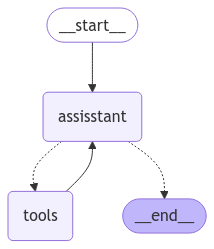

In [55]:
from langgraph.graph import START,END,StateGraph
from langgraph.prebuilt import tools_condition
from langgraph.prebuilt import ToolNode
from IPython.display import display,Image

builder = StateGraph(MessageState)

builder.add_node("assisstant",assisstant)
builder.add_node("tools",ToolNode(tools))

builder.add_edge(START,"assisstant")
builder.add_conditional_edges(
    "assisstant",
    tools_condition
)

builder.add_edge("tools","assisstant")

react_graph = builder.compile()

display(Image(react_graph.get_graph().draw_mermaid_png()))

In [56]:
messages = [HumanMessage(content="Add 10 and 14.multiply the output by 2.divide the output by 5")]

react_graph.invoke({"messages":messages})

{'messages': [HumanMessage(content='Add 10 and 14.multiply the output by 2.divide the output by 5', additional_kwargs={}, response_metadata={}, id='ddf33047-150e-4f8e-a46c-3a1f683465ff'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_wNtpvjOmdUBcmtOWnlfiMVfX', 'function': {'arguments': '{"a": 10, "b": 14}', 'name': 'add'}, 'type': 'function'}, {'id': 'call_NUtOPwPd6mgfLghEIXOTvyYc', 'function': {'arguments': '{"a": 24, "b": 2}', 'name': 'multiply'}, 'type': 'function'}, {'id': 'call_VSiSdmxegJkZEMMgdTUvbSdw', 'function': {'arguments': '{"a": 48, "b": 5}', 'name': 'divide'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 68, 'prompt_tokens': 151, 'total_tokens': 219, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fi